In [1]:
# Import some standard packages.
import numpy as np
import pandas as pd
import datetime
import locale
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Import the data and convert the date to the appropriate type
df = pd.read_csv('pharmacy_tx.csv', parse_dates=[0])

In [3]:
#We don't expect formulary status or patient pay to change by the day or week,
#but month is important; e.g. patient pay is higher in January before the deductible is met.
df['month'] = df['tx_date'].dt.month_name(locale = 'en_US')

In [4]:
#We split the entries in the 'drug' column according to whether they are branded or not.
list_1 = []
list_2 = []
for s in df['drug']:
    chemical = s.split(" ")[1]
    list_1.append(chemical)
    branded_status = s.split(" ")[0]
    if branded_status == 'branded':
        list_2.append(True)
    else:
        list_2.append(False)

In [5]:
#Here are the new columns created by separating the branded or generic status.
df['chemical'] = pd.DataFrame(list_1, columns = ['chemical'])
df['branded'] = pd.DataFrame(list_2, columns=['branded'])

In [6]:
#Let's have a look at the data
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,month,chemical,branded
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,January,tanoclolol,True
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,January,oxasoted,True
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,January,cupitelol,True
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,January,oxasoted,False
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,January,mamate,True


In [7]:
#We'll one-hot encode the drugs
dummies = pd.get_dummies(df[['chemical']], drop_first=True)
df = pd.concat([df.drop(['chemical'],axis=1), dummies],axis=1)

In [8]:
#Let's take a look at a big insurance company (bin:664344)
df_1 = df[df['bin']==664344]

In [12]:
#We'll concern ourselves only with the features 'rejected','patient_pay','branded', and the drugs.
df_1 = df_1.drop(columns=['tx_date', 'pharmacy', 'diagnosis', 'drug', 'bin', 'pcn', 'group', 'month'])

In [14]:
#Before we do a dimensionality reduction with PCA, we run it through a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_1)
scaled_df_1=scaler.transform(df_1)

In [15]:
#Now we'll do a PCA to reduce the dimension
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_df_1)

PCA(n_components=2)

In [16]:
#The new data has only 2 components
df_1_pca = pca.transform(scaled_df_1)
df_1_pca.shape

(3855462, 2)

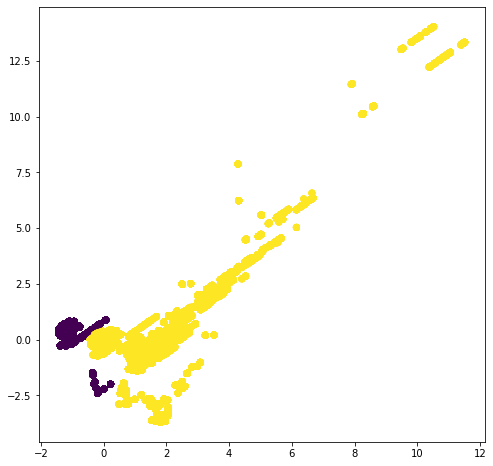

In [18]:
#Here's a matplotlib graph of the data
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(df_1_pca[:,0],df_1_pca[:,1],c=df_1['branded'])
plt.show()

In [19]:
#A plotly graph would probably be prettier, so we'll convert the transformed data into a dataframe
df_1_PCA = pd.DataFrame(df_1_pca, columns=['x','y'])

In [22]:
#These interactive graphs take alot of memory though
#fig = px.scatter(df_1_PCA, x='x', y='y')
#fig.show()